In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image

In [ ]:
# Upload an image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

Saving WhatsApp Image 2025-02-11 at 08.46.36_2380bef9.jpg to WhatsApp Image 2025-02-11 at 08.46.36_2380bef9.jpg


In [ ]:
# Load the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
# 🔹 Lossy Compression (JPEG)
jpeg_path = "compressed_image.jpg"
cv2.imwrite(jpeg_path, image, [cv2.IMWRITE_JPEG_QUALITY, 50])

True

In [ ]:
# 🔹 Lossless Compression (PNG)
png_path = "compressed_image.png"
cv2.imwrite(png_path, image, [cv2.IMWRITE_PNG_COMPRESSION, 9])

True

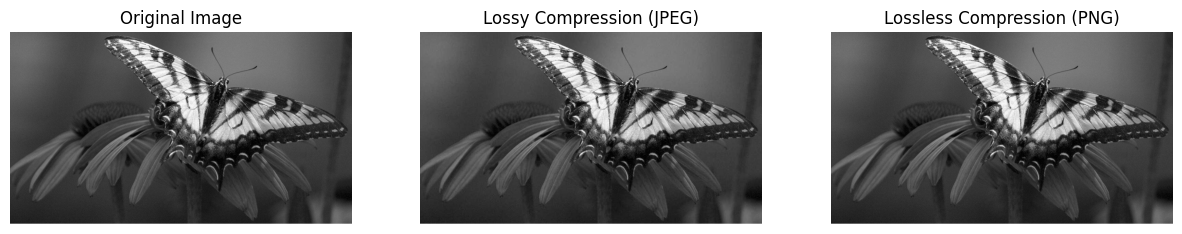

In [ ]:
# Display Images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image)
axs[0].set_title("Original Image")
axs[0].axis("off")

jpeg_img = Image.open(jpeg_path)
axs[1].imshow(jpeg_img)
axs[1].set_title("Lossy Compression (JPEG)")
axs[1].axis("off")

png_img = Image.open(png_path)
axs[2].imshow(png_img)
axs[2].set_title("Lossless Compression (PNG)")
axs[2].axis("off")

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist, cifar10
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns

In [ ]:
# Load MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:

# Reshape & Normalize Data (MNIST)
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# CNN Model for MNIST
model_mnist = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_mnist.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_mnist = model_mnist.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), batch_size=128)


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8131 - loss: 0.6052 - val_accuracy: 0.9839 - val_loss: 0.0525
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9715 - loss: 0.0961 - val_accuracy: 0.9870 - val_loss: 0.0382
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9798 - loss: 0.0679 - val_accuracy: 0.9899 - val_loss: 0.0293
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9845 - loss: 0.0558 - val_accuracy: 0.9907 - val_loss: 0.0300
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9858 - loss: 0.0455 - val_accuracy: 0.9900 - val_loss: 0.0285
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9881 - loss: 0.0406 - val_accuracy: 0.9904 - val_loss: 0.0284
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9895 - loss: 0.0334 - val_accuracy: 0.9911 - val_loss: 0.0241
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9908 - loss: 0.0292 - val_accuracy: 

In [ ]:
# Evaluate Model
y_pred_mnist = model_mnist.predict(x_test)
y_pred_classes = y_pred_mnist.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')
f1 = f1_score(y_true, y_pred_classes, average='macro')
cm = confusion_matrix(y_true, y_pred_classes)

print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
Accuracy: 0.9941, Precision: 0.9941, Recall: 0.9940, F1 Score: 0.9940


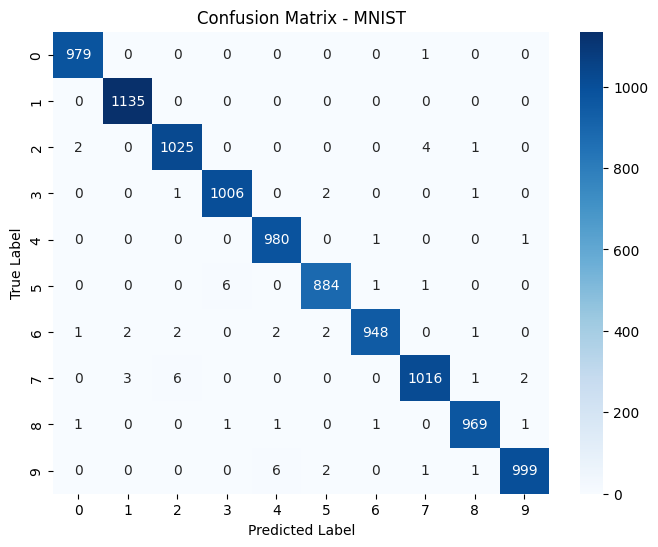

In [ ]:
# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - MNIST")
plt.show()

In [ ]:
# Load CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize Data (CIFAR-10)
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
# CNN Model for CIFAR-10
model_cifar10 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_cifar10.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train Model
history_cifar10 = model_cifar10.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), batch_size=128)


Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.2855 - loss: 1.9345 - val_accuracy: 0.4968 - val_loss: 1.4218
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4748 - loss: 1.4552 - val_accuracy: 0.5690 - val_loss: 1.2444
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5292 - loss: 1.3200 - val_accuracy: 0.6023 - val_loss: 1.1292
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5672 - loss: 1.2204 - val_accuracy: 0.6208 - val_loss: 1.0867
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5968 - loss: 1.1379 - val_accuracy: 0.6457 - val_loss: 1.0101
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6158 - loss: 1.0888 - val_accuracy: 0.6632 - val_loss: 0.9672
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6307 - loss: 1.0458 - val_accuracy: 0.6732 - val_loss: 0.9390
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6483 - loss: 1.0048 - val_accuracy: 0

In [ ]:
# Evaluate Model
y_pred_cifar10 = model_cifar10.predict(x_test)
y_pred_classes = y_pred_cifar10.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')
f1 = f1_score(y_true, y_pred_classes, average='macro')
cm = confusion_matrix(y_true, y_pred_classes)

print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.7182, Precision: 0.7200, Recall: 0.7182, F1 Score: 0.7187


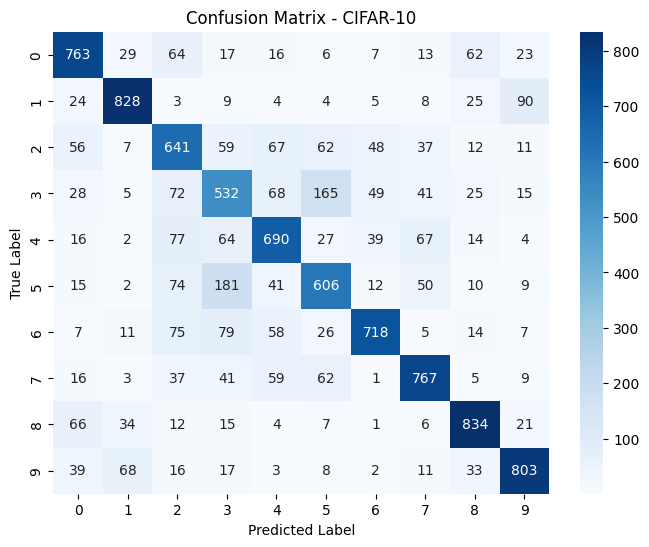

In [ ]:
# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - CIFAR-10")
plt.show()